**Objective: Forest vs Building classiication Using ANN**

Importing packages

In [ ]:
import tensorflow as tf

In [ ]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3 MB 42 kB/s 
     |████████████████████████████████| 3.8 MB 46.0 MB/s 
     |████████████████████████████████| 449 kB 52.5 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=4e31ed6b7011bf912eb18f6903efde11420826eafa4b1343ae7c223042174ae5
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Success

In [ ]:
# restart the runtime

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
# Import libraries and packages
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
import time   # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

warnings.filterwarnings("ignore")
SEED = 42   # set random seed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/DL/Image classification")

In [ ]:
!dir

dataset   dataset3	  test_examples   test_examples3
dataset1  dataset.rar	  test_examples1  test_examples.rar
dataset2  Project1.ipynb  test_examples2


In [ ]:
# Extract dataset.rar file
!pip install patool

     |████████████████████████████████| 77 kB 4.2 MB/s 


In [ ]:
import patoolib
patoolib.extract_archive("dataset.rar")

patool: Extracting dataset.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/DL/Image classification/dataset.rar"
patool:     with cwd='./Unpack__e931cnm'
patool: ... dataset.rar extracted to `dataset4' (local file exists).


'dataset4'

In [ ]:
patoolib.extract_archive("test_examples.rar")

patool: Extracting test_examples.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/DL/Image classification/test_examples.rar"
patool:     with cwd='./Unpack_lvwn2bef'
patool: ... test_examples.rar extracted to `test_examples4' (local file exists).


'test_examples4'

In [ ]:
# initialize the data and labels
print("[INFO] loading images...")
time1 = time.time()   # to measure time taken
data = []
labels = []

classes = ["Forest", "Buildings"]

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('dataset')))   # data folder with 2 categorical folders
random.seed(SEED)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for imagePath in imagePaths:
        # load the image, resize the image to be 32x32 pixels (ignoring aspect ratio), 
        # flatten the 32x32x3=3072 pixel image into a list, and store the image in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32)).flatten()
        data.append(image)

        # extract the class label from the image path and update the labels list
        label = imagePath.split(os.path.sep)[-2]
        
        label = 1 if label == "Buildings" else 0
        labels.append(label)
        
        # update the progressbar
        pbar.update(1)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
print("done")

[INFO] loading images...


  0%|          | 0/883 [00:00<?, ?it/s]

Time taken: 173.3 seconds
done


In [ ]:
print(f'Total images: {len(data)}')

Total images: 883


In [ ]:
len(data[1])

3072

In [ ]:
# sample data for first image
print("sample image: {}".format(data[0]))
print("no of features/pixels values: {}".format(len(data[0]))) # 32x32x3=3072
print("label: {}".format(classes[labels[0]]))

sample image: [0.31764706 0.29803922 0.28627451 ... 0.74117647 0.58823529 0.4627451 ]
no of features/pixels values: 3072
label: Forest


Train test split

In [ ]:
trainX, testX, trainY, testY = train_test_split( data, labels, random_state=SEED, test_size=0.2)

In [ ]:
trainX.shape

(706, 3072)

In [ ]:
testX.shape

(177, 3072)

In [ ]:
trainY.shape

(706,)

In [ ]:
testY.shape

(177,)

In [ ]:
type(trainY)

numpy.ndarray

In [ ]:
testY

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1])

Data preprocessing

In [ ]:
# convert the labels from integers/categories to vectors 

trainY = to_categorical(trainY, num_classes=2)   # fit_transform = find all unique class labels + transform into one-hot encoded labels
testY = to_categorical(testY, num_classes=2)     # transform = perform the one-hot encoding (unique class labels already found)

# [0,1] Buildings
# [1,0] Forest

In [ ]:
trainY

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
trainY.shape

(706, 2)

In [ ]:
sample_image = (trainX[7] * 255).astype("int")

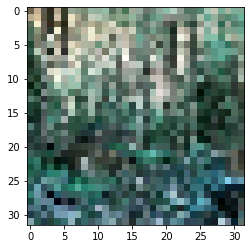

In [ ]:
plt.imshow(sample_image.reshape(32,32,3))

In [ ]:
trainX[7]

array([0.41176471, 0.38039216, 0.29803922, ..., 0.36470588, 0.44705882,
       0.41568627])

Defining architecture of the model

In [ ]:
model = Sequential()

model.add(Dense(units= 1024, input_shape=(3072,), kernel_initializer = 'uniform', activation="relu"))

model.add(Dense(units=512, kernel_initializer='uniform', activation="relu"))

model.add(Dense(units=2,kernel_initializer='uniform', activation='softmax'))

Compiling tensorfflow ANN model

In [ ]:
INIT_LR = 0.01
EPOCHS = 50

print("[INFO] compiling network...")

opt = SGD(lr=INIT_LR)
model.compile(loss="binary_crossentropy" , optimizer=opt, metrics=["accuracy"])

[INFO] compiling network...


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 3,672,578
Trainable params: 3,672,578
Non-trainable params: 0
_________________________________________________________________


Training the model

In [ ]:
time1 = time.time()
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)

print('Time taken: {:.1f} seconds'.format(time.time() - time1))

Epoch 1/50
23/23 [==============================] - 1s 14ms/step - loss: 0.6625 - accuracy: 0.5411 - val_loss: 0.6468 - val_accuracy: 0.5367
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.6291 - accuracy: 0.5567 - val_loss: 0.6249 - val_accuracy: 0.5367
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.6099 - accuracy: 0.5637 - val_loss: 0.6039 - val_accuracy: 0.7006
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5886 - accuracy: 0.6544 - val_loss: 0.5758 - val_accuracy: 0.6158
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5641 - accuracy: 0.6912 - val_loss: 0.5597 - val_accuracy: 0.8531
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5426 - accuracy: 0.7521 - val_loss: 0.5294 - val_accuracy: 0.8531
Epoch 7/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5208 - accuracy: 0.7734 - val_loss: 0.5158 - val_accuracy: 0.8757
Epoch 8/50
23/23 [=

Evaluating the model

In [ ]:
print("[INFO] evaluatmg network...")
pred_prob = model.predict(testX, batch_size=32)

[INFO] evaluatmg network...


In [ ]:
pred_prob

array([[5.82240429e-03, 9.94177580e-01],
       [9.99986649e-01, 1.34094089e-05],
       [1.98107306e-03, 9.98018980e-01],
       [9.99996781e-01, 3.25661813e-06],
       [8.99103165e-01, 1.00896858e-01],
       [9.99999881e-01, 1.08507798e-07],
       [1.96510297e-03, 9.98034894e-01],
       [9.72377598e-01, 2.76224520e-02],
       [9.99860883e-01, 1.39080090e-04],
       [1.00000000e+00, 3.27220973e-10],
       [6.75339699e-01, 3.24660271e-01],
       [9.12199736e-01, 8.78002569e-02],
       [4.64361086e-02, 9.53563869e-01],
       [9.91008699e-01, 8.99128988e-03],
       [5.23779809e-01, 4.76220161e-01],
       [9.46865380e-01, 5.31346500e-02],
       [1.11994639e-01, 8.88005316e-01],
       [4.76499787e-04, 9.99523520e-01],
       [9.99998927e-01, 1.01344062e-06],
       [2.58456590e-03, 9.97415423e-01],
       [5.96488535e-01, 4.03511465e-01],
       [9.73656654e-01, 2.63434015e-02],
       [9.95619357e-01, 4.38065222e-03],
       [3.95249296e-03, 9.96047556e-01],
       [1.190460

In [ ]:
# buildings = 1  forest = 0

In [ ]:
test_y = [np.argmax(i) for i in testY]
pred_y = [np.argmax(i) for i in pred_prob]

In [ ]:
pred_y[0:5]

[1, 0, 1, 0, 0]

In [ ]:
def plot_confusion_metrix(y_true, y_pred,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    Objective
    ----------
    plot confussion matrix, classification report and accuracy score
    
    parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    classes : list
        List of labels to index the matrix
        
    title : title for matrix
    cmap : colormap for matrix 
    
    returns 
    ----------
   all accruacy matrix 
    """
    
    
    cm = confusion_matrix(y_true,y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")

    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.tight_layout()
    
    plt.show()
    
    print("-----------------------------------------------------")
    print('Classification report')
    print(classification_report(y_true,y_pred))
    
    print("-----------------------------------------------------")
    acc= accuracy_score(y_true,y_pred)
    print("Accuracy of the model: ", acc)

Confusion Matrix, Without Normalisation


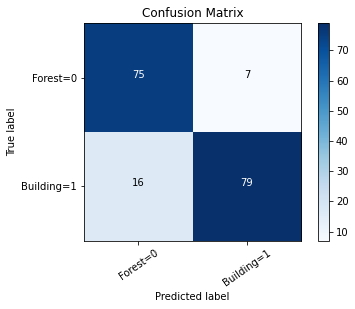

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.82      0.91      0.87        82
           1       0.92      0.83      0.87        95

    accuracy                           0.87       177
   macro avg       0.87      0.87      0.87       177
weighted avg       0.87      0.87      0.87       177

-----------------------------------------------------
Accuracy of the model:  0.8700564971751412


In [ ]:
plot_confusion_metrix(test_y,pred_y,classes=["Forest=0","Building=1"])

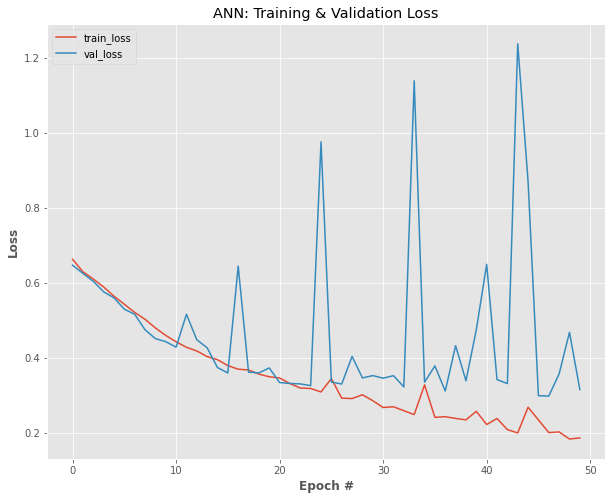

In [ ]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("ANN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

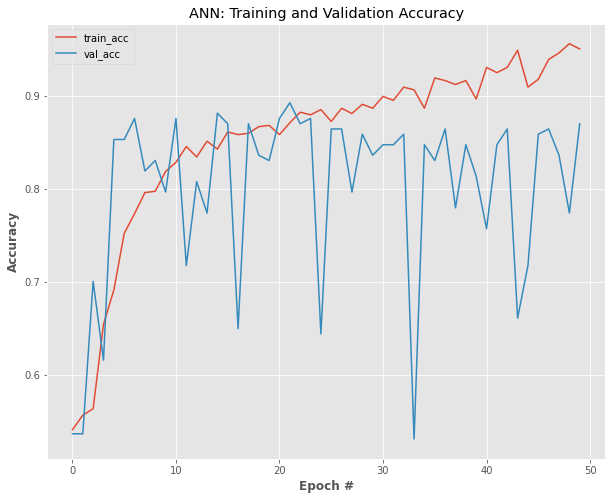

In [ ]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("ANN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

Saving the model

In [ ]:
print("[INFO] serializing network and label binarizer...")
model.save('model_ANN.h5')

[INFO] serializing network and label binarizer...


Making predictions using trained model

In [ ]:
# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [ ]:
# load the input image and resize it to the target spatial dimensions
width = 32
height = 32

# grab the image paths and randomly shuffle them
testImagePaths = sorted(list(paths.list_images('test_examples')))   # test data folder with random images


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        image = cv2.imread(imagePath)
        output = image.copy()
        image = cv2.resize(image, (width, height))

        # scale the pixel values to [0, 1]
        image = image.astype("float") / 255.0

        # for a simple fully-connected network, flatten the image
        image = image.flatten()
        image = image.reshape((1, image.shape[0]))


        # make a prediction on the image
        preds = model.predict(image)

        # find the class label index with the largest corresponding probability
        i = preds.argmax(axis=1)[0]
        label = classes[i]
        
        label = "{}: {:.2f}%".format(label, preds[0][i] * 100)

        
        output = imutils.resize(output, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (0, 255, 0), 2)
        
        # convert img to rgb format and display in noteboo
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

#         print("############################")
#         print("image: {}".format(os.path.split(imagePath)[-1]))
#         print("predicted label: {}".format(label))
#         print("Confidence: {}".format(preds[0][i]))
        
        pbar.update(1)

Output hidden; open in https://colab.research.google.com to view.

Deployment

In [61]:
pip install gradio 

  Using cached gradio-2.7.0-py3-none-any.whl (865 kB)
     |████████████████████████████████| 210 kB 18.5 MB/s 
     |████████████████████████████████| 2.0 MB 51.9 MB/s 
     |████████████████████████████████| 3.6 MB 47.5 MB/s 
     |████████████████████████████████| 856 kB 52.3 MB/s 
     |████████████████████████████████| 61 kB 469 kB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=0815fd6cf50a35c82001b98f859f9e82cd70e60ae80d8b11d4cd173d5fca9298
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=e1e0733efb6d1634c4592c37ab5b7cb5671361a441d32b41850357197501b44e
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [62]:
import gradio as gr

In [63]:
def predict_image(image):
    
    image = cv2.resize(image, (32, 32))

    # scale the pixel values to [0, 1]
    image = image.astype("float") / 255.0

    # for a simple fully-connected network, flatten the image
    image = image.flatten()
    image = image.reshape((1, image.shape[0]))

    # make a prediction on the image
    preds = model.predict(image).flatten()
    result = dict()
    result["Forest"] = round(float(list(preds)[0]), 3)
    result["Buildings"] = round(float(list(preds)[1]), 3)
    print(result)
    
    return result

im = gr.inputs.Image(shape=(32,32))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=im, outputs=label, capture_session=True, title="ANN Demo").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://35393.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://35393.gradio.app')